In [3]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
train_data= pd.read_csv('titanic_train.csv')

In [6]:
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Question 1: Who were the passengers on titanic (age, gender, class etc)

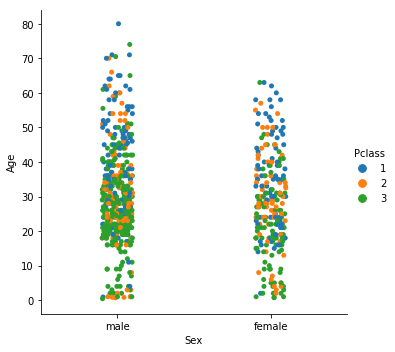

In [8]:
sns.catplot(x='Sex', y='Age', hue='Pclass', data= train_data)

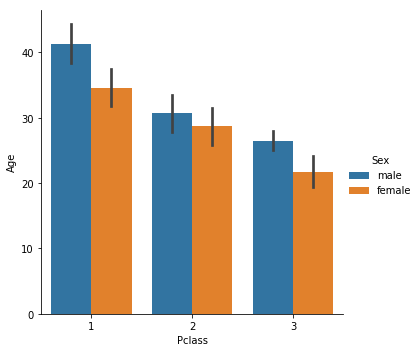

In [9]:
sns.catplot(x='Pclass', y='Age', hue='Sex', data= train_data, kind='bar')

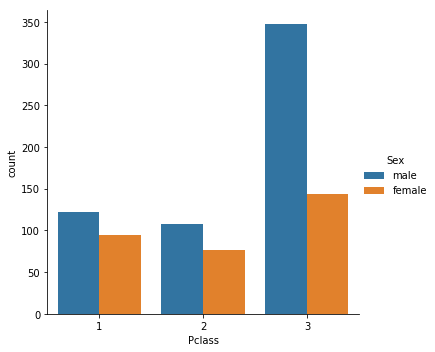

In [10]:
sns.catplot(x='Pclass', hue='Sex', data= train_data, kind='count')

In [11]:
# lets create a new category to determine child, female and male as person

def child_male_female(passenger):
    age, sex= passenger
    
    if age<16:
        return 'child'
    else:
        return sex


In [12]:
train_data['person']= train_data[['Age', 'Sex']].apply(child_male_female, axis=1)

In [13]:
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


/Users/sanch_g/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/sanch_g/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([14., 10.,  6.,  0., 10.,  4.,  3.,  3.,  4.,  8.,  2.,  4.,  0.,
         1.,  2.,  7.,  5., 17., 13., 26.,  0., 25., 16., 24., 27., 15.,
        31., 24., 18.,  0., 18., 27., 20., 25., 19., 18., 17., 15.,  1.,
        18., 23.,  6., 11., 14., 13.,  8.,  0., 13.,  5.,  9., 14.,  3.,
         9.,  9.,  6.,  0., 10.,  7.,  6.,  1.,  8.,  2.,  5.,  2.,  0.,
         5.,  2.,  4.,  3.,  4.,  2.,  2.,  0.,  3.,  1.,  0.,  0.,  0.,
         2.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.42      ,  1.30422222,  2.18844444,  3.07266667,  3.95688889,
         4.84111111,  5.72533333,  6.60955556,  7.49377778,  8.378     ,
         9.26222222, 10.14644444, 11.03066667, 11.91488889, 12.79911111,
        13.68333333, 14.56755556, 15.45177778, 16.336     , 17.22022222,
        18.10444444, 18.98866667, 19.87288889, 20.75711111, 21.64133333,
        22.52555556, 23.40977778, 24.294     , 25.17822222, 26.06244444,
        26.94666667, 27.83088889, 28.71511111, 29.5993

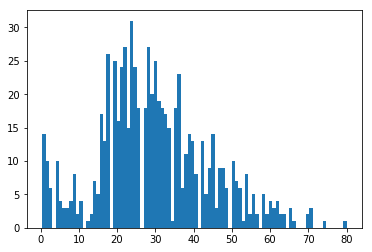

In [14]:
plt.hist('Age', bins=90,data= train_data)

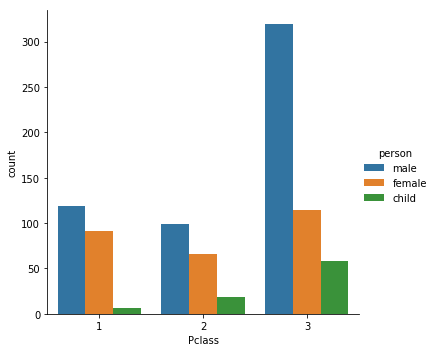

In [15]:
sns.catplot(x='Pclass', data=train_data, hue='person', kind='count')

In [16]:
train_data['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

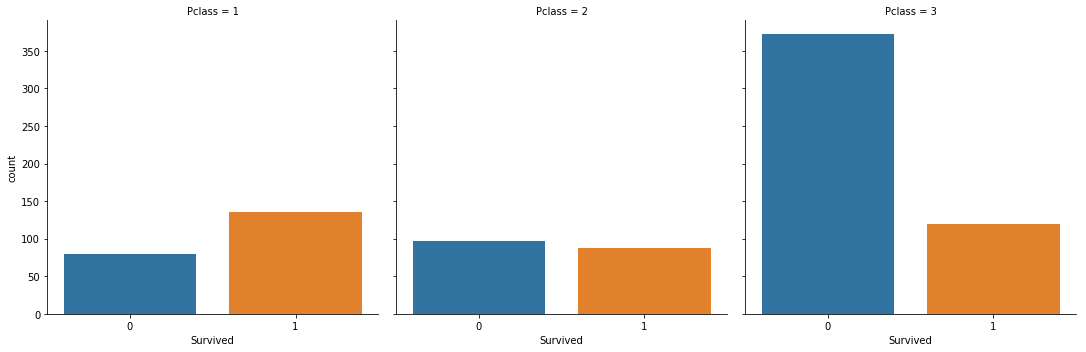

In [17]:
sns.catplot("Survived", col="Pclass",data= train_data,               
            kind="count")

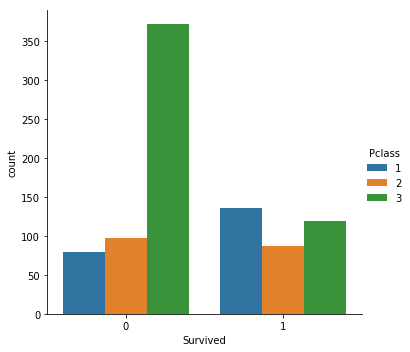

In [18]:
sns.catplot("Survived", hue="Pclass",data= train_data,               
            kind="count")

In [19]:
#sns.catplot("Age", hue="Sex", data=train_data, kind="bar", aspect=4, legend=True)

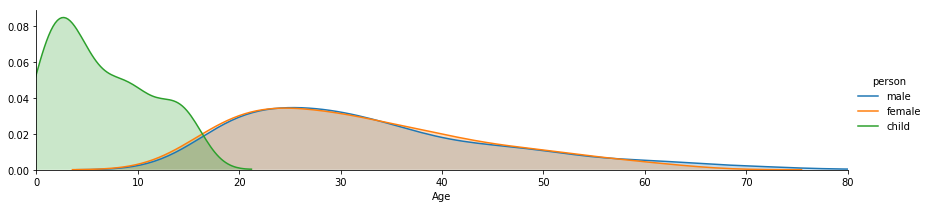

In [20]:
fig = sns.FacetGrid(train_data, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = train_data['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

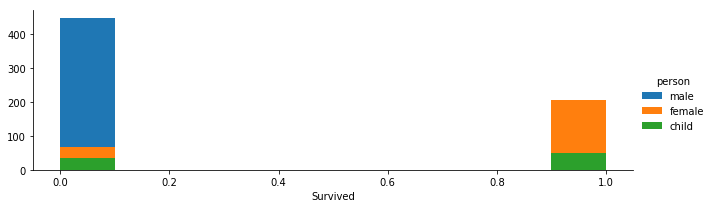

In [21]:
new= sns.FacetGrid(train_data, hue= 'person', aspect=3)
new.map(plt.hist, 'Survived')
new.add_legend()

The above graph shows that none of the male members survived. Onlychildren and female survived.

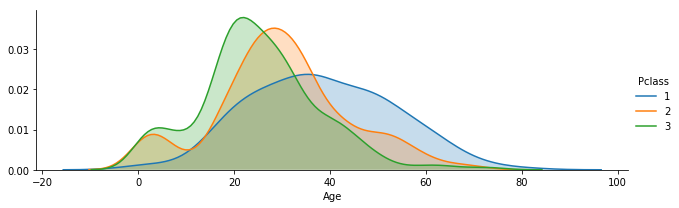

In [22]:
new= sns.FacetGrid(train_data, hue='Pclass', aspect=3)
new.map(sns.kdeplot, 'Age', shade= True)
new.add_legend()

Question 2: What deck were the passengers on and how does that relate to their class?

In [23]:
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [24]:
deck= train_data['Cabin'].dropna()

In [25]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [26]:
levels=[]

for i in deck:
    levels.append(i[0])
    
cabin_df= DataFrame(levels)
cabin_df.columns=['Cabin']

cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


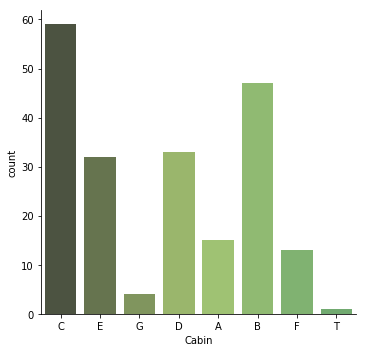

In [27]:
sns.catplot('Cabin', data=cabin_df, palette='summer_d', kind='count')

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [105]:
#sns.catplot("Survived", col="Cabin", col_wrap=4, data=train_data[train_data.Cabin.notnull()],
 #              kind="count", height=2.5, aspect=.8)

In [30]:
Cabin_s=[]
train_data['Cabin_s']= train_data['Cabin'].fillna('OI')
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Cabin_s
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,OI
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,OI
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,OI


In [31]:
Deck=[]
Cabin_new=train_data['Cabin_s']

for i in Cabin_new:
     Deck.append(i[0])
train_data['Deck']= Deck

In [32]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Cabin_s,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,OI,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,OI,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C123,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,OI,O


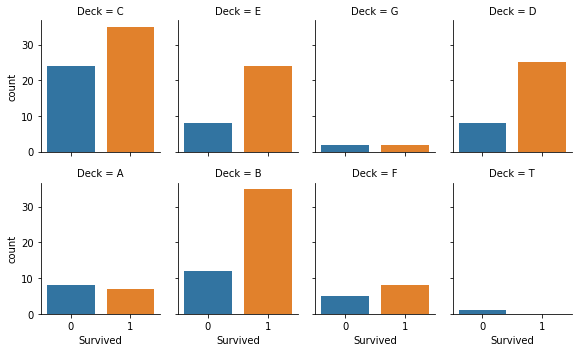

In [33]:
sns.catplot("Survived", col="Deck", col_wrap=4, 
            data=train_data[train_data.Deck!='O'],
               kind="count", height=2.5, aspect=.8)

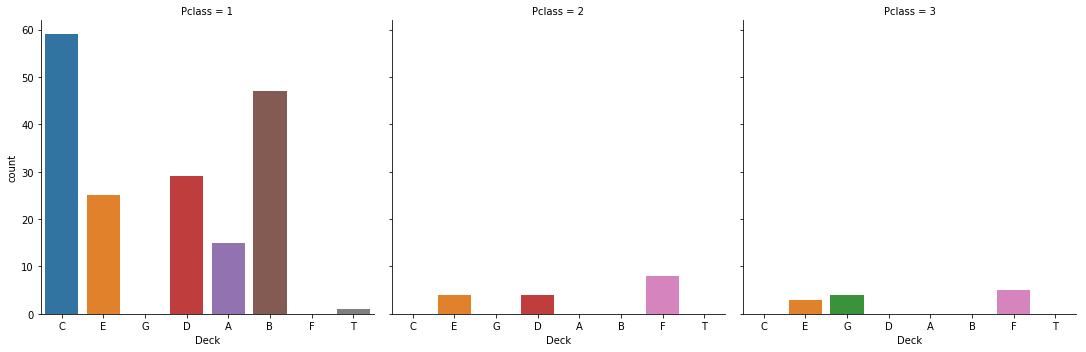

In [34]:
sns.catplot("Deck", col="Pclass",  
            data=train_data[train_data.Deck!='O'],
               kind="count")

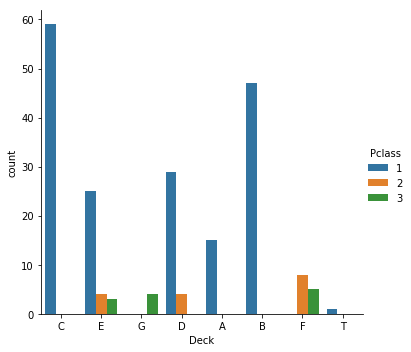

In [35]:
sns.catplot("Deck", hue="Pclass",  
            data=train_data[train_data.Deck!='O'],
               kind="count")

Question 3: Where did the passengers come from?

In [36]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Cabin_s,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,OI,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,OI,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C123,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,OI,O


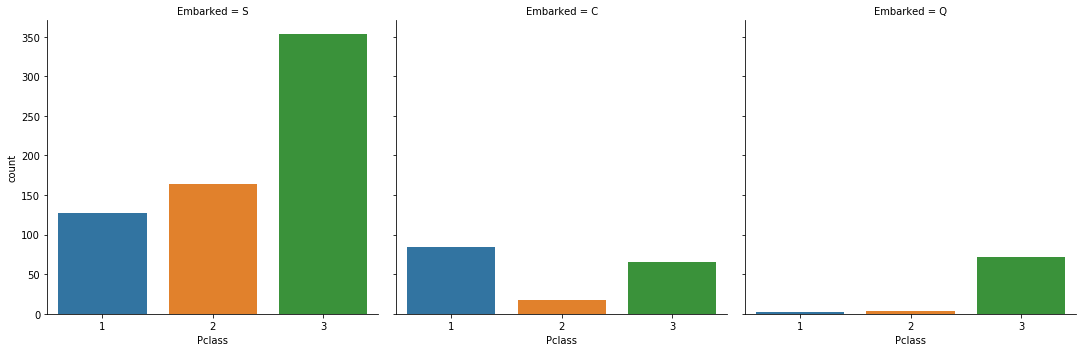

In [37]:
sns.catplot('Pclass', col='Embarked', data=train_data, kind='count')

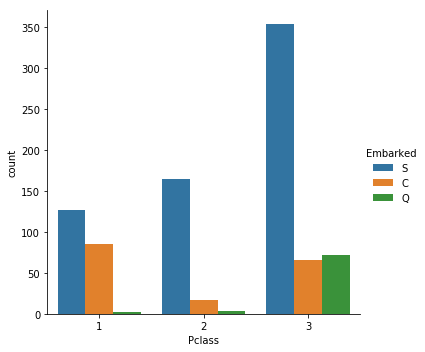

In [38]:
sns.catplot('Pclass', hue='Embarked', data=train_data, kind='count')

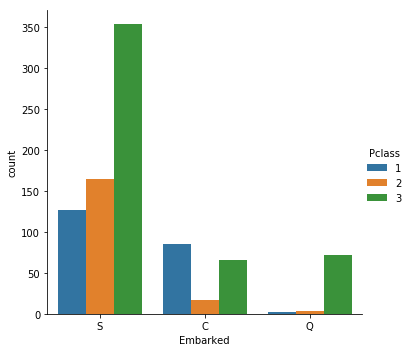

In [39]:
sns.catplot('Embarked', hue='Pclass', data=train_data, kind='count')

Question 4: Who was alone and who was with family?

In [40]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Cabin_s,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,OI,O
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,OI,O
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C123,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,OI,O


In [41]:
train_data['Alone']= train_data.SibSp + train_data.Parch
train_data.head(15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Cabin_s,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,OI,O,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,OI,O,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C123,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,OI,O,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,OI,O,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E46,E,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,OI,O,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,OI,O,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,OI,O,1


In [42]:
#yohoooo it worked!!
train_data.loc[train_data.Alone>0, 'Alone']="With_Family"
train_data.loc[train_data.Alone==0, 'Alone']="Alone"



#Did not work as expected :(.

#for i in train_data['Alone']:
#   if i==0:
#        train_data['Alone']= train_data.Alone[i]= "Alone"
        
#    else:
#        train_data['Alone']= train_data.Alone[i]= "With_Family"

In [43]:
train_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Cabin_s,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,OI,O,With_Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C85,C,With_Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,OI,O,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C123,C,With_Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,OI,O,Alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,OI,O,Alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E46,E,Alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,OI,O,With_Family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,OI,O,With_Family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,OI,O,With_Family


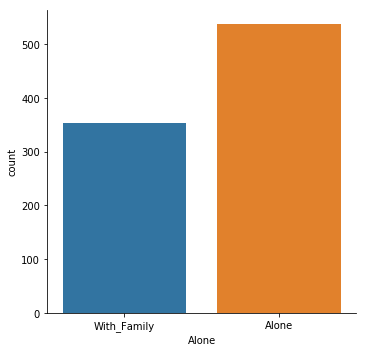

In [44]:
sns.catplot(x='Alone', data=train_data, kind='count')

Question 5: What factors helped someone survive the sinking?

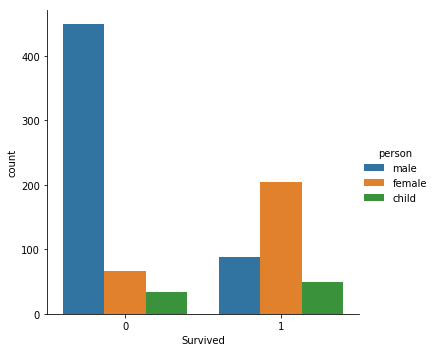

In [45]:
sns.catplot(x='Survived', hue='person', data=train_data, kind='count')

Maximum children survived and max male died.

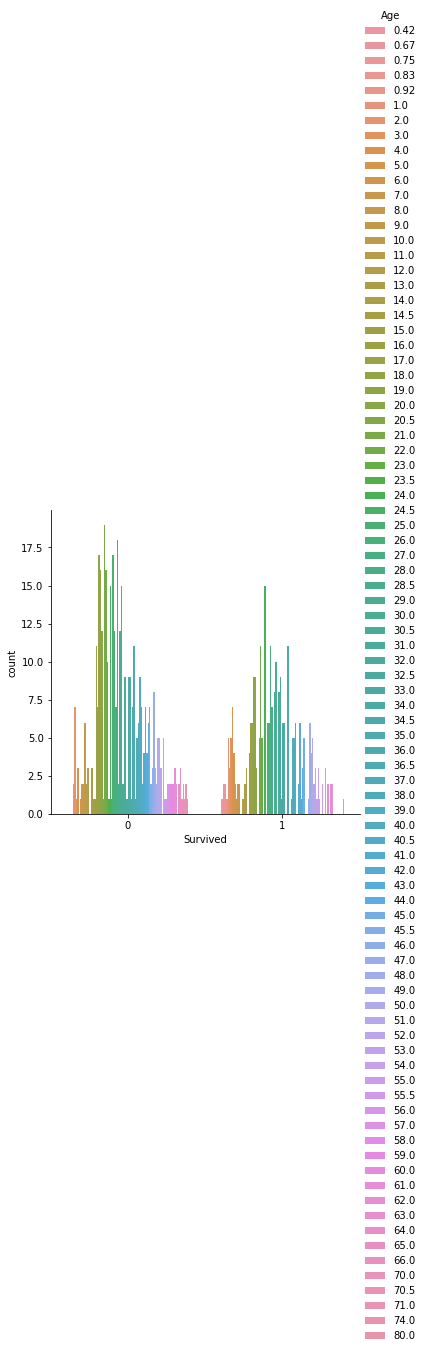

In [46]:
sns.catplot(x='Survived', hue='Age', data=train_data, kind='count')

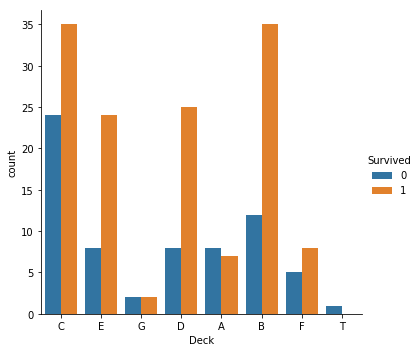

In [47]:
#Did the deck have an effect on the passengers survival rate?
sns.catplot(x='Deck', hue='Survived', 
            data=train_data[train_data.Deck!='O'], 
            kind='count')

Maximum people from C and B deck survived.

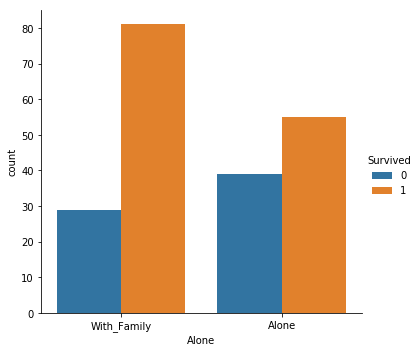

In [48]:
#Did having a family member increase the odds of surviving the crash?
sns.catplot(x='Alone', hue='Survived', 
            data=train_data[train_data.Deck!='O'], 
            kind='count')

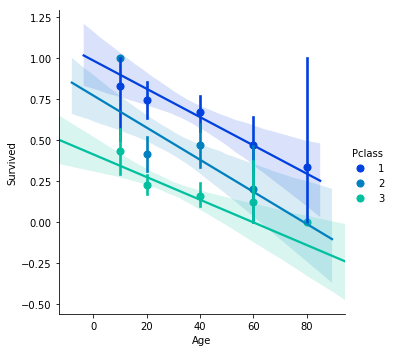

In [49]:
# Let's use a linear plot on age versus survival using hue for class seperation
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=train_data,palette='winter',x_bins=generations)

In [68]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

X= pd.read_csv('titanic_train.csv')
X_test= pd.read_csv('titanic_test.csv')

In [69]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
X_train= X.drop(['Survived','Name','Ticket','Embarked','Cabin','Sex'], axis=1)

Y= X.Survived

In [98]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [99]:
#flatten the Y array
Y=np.ravel(Y)

In [100]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [104]:


X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
